### 성별이 여자면 생존, 남자면 사망으로 예측해 실제와 정확도 비교

In [1]:
from sklearn.base import BaseEstimator
import numpy as np
class MyDummyClassifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
            
        return pred

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Null 처리
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩
def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

In [4]:
my = MyDummyClassifier()

In [5]:
my.fit(X_train, y_train)

In [6]:
pred = my.predict(X_test)

In [7]:
accuracy_score(y_test, pred)

0.7877094972067039

## MNIST 데이터 셋

In [8]:
from sklearn.datasets import load_digits

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X데이터 세트의 크기만큼 모두 0값으로 만들어서 변환
    def predict(self, X):
        return np.zeros( (len(X),1), dtype=bool)

In [9]:
# 사이킷런의 내장 데이터 세트인 laod_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

In [10]:
# digits 번호가 7이면 True, 이를 astype(int)으로 1로 변환
# digits 번호가 7이 아니 False, 이를 astype(int)으로 0로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [11]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
# 불균형한 레이블 데이터 분포도 확인
print(y_test.shape)
print(pd.Series(y_train).value_counts())

(450,)
0    1213
1     134
dtype: int64


In [13]:
fake = MyFakeClassifier()
fake.fit(X_train, y_train)
pred = fake.predict(X_test)
accuracy_score(y_test, pred)

0.9

### 오차 행렬

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

### 정밀도와 재현율

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}'.format(accuracy, precision, recall))

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869


C:\Users\admin\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 정밀도/재현율 트레이드오프

In [17]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)

In [18]:
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
pred_proba_result[:3]

array([[0.4616653 , 0.5383347 , 1.        ],
       [0.87862763, 0.12137237, 0.        ],
       [0.87727002, 0.12272998, 0.        ]])

In [19]:
from sklearn.preprocessing import Binarizer

In [20]:
X = [[1,-1,2],
     [2,0,0],
     [0,1.1,1.2]]

In [21]:
bi = Binarizer(threshold=1.1)
bi.fit_transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [22]:
# Binarizer의 threshold 설정값, 분류 결정 임계값
custom_threshold = 0.6

# predic_proba() 반환값의 두 번째 칼럼, 
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
bi = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = bi.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

# threshold = 0.5
# 오차행렬
# [[92 18]
#  [16 53]]
# 정확도 : 0.8101, 정밀도 : 0.7465, 재현율 : 0.7681

# threshold = 0.4
# 오차행렬
# [[86 24]
#  [13 56]]
# 정확도 : 0.7933, 정밀도 : 0.7000, 재현율 : 0.8116

오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 : 0.8824, 재현율 : 0.7377


In [23]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값 :', custom_threshold)
        get_clf_eval(y_test, custom_predict)

In [27]:
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임계값 : 0.4
오차행렬
[[99 19]
 [10 51]]
정확도 : 0.8380, 정밀도 : 0.7286, 재현율 : 0.8361
임계값 : 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도 : 0.7656, 재현율 : 0.8033
임계값 : 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869
임계값 : 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도 : 0.8364, 재현율 : 0.7541
임계값 : 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 : 0.8824, 재현율 : 0.7377


### 사이킷런 precision_recall_curve() API이용

In [31]:
from sklearn.metrics import precision_recall_curve

In [35]:
# 레이블 값이 1일 때 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레블 값 1일 때 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되 임계값을 15 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개 임계값: ', np.round(thresholds[thr_index],2 ))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임게값별 정밀도:', np.round(precisions[thr_index], 3))
print('샘플 임게값별 재현율:', np.round(recalls[thr_index], 3))


반환된 분류 결정 임곗값 배열의 Shape: (143,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개 임계값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.57 0.67 0.82 0.95]
샘플 임게값별 정밀도: [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임게값별 재현율: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [42]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

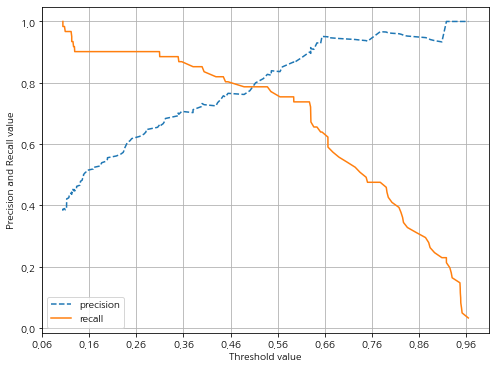

In [42]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

## F1 스코어(정밀도와 재현율 결합한 지표)

In [45]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
f1


0.7804878048780488

In [51]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    
    # f1 score print 추가
    print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}, F1:{:.4f}\n'.format(accuracy, precision, recall,f1))
 
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

임계값 : 0.4
오차행렬
[[99 19]
 [10 51]]
정확도 : 0.8380, 정밀도 : 0.7286, 재현율 : 0.8361, F1:0.7786

임계값 : 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도 : 0.7656, 재현율 : 0.8033, F1:0.7840

임계값 : 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869, F1:0.7805

임계값 : 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도 : 0.8364, 재현율 : 0.7541, F1:0.7931

임계값 : 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 : 0.8824, 재현율 : 0.7377, F1:0.8036

임계값 : 0.65
오차행렬
[[115   3]
 [ 22  39]]
정확도 : 0.8603, 정밀도 : 0.9286, 재현율 : 0.6393, F1:0.7573

임계값 : 0.7
오차행렬
[[116   2]
 [ 28  33]]
정확도 : 0.8324, 정밀도 : 0.9429, 재현율 : 0.5410, F1:0.6875



## ROC 곡선과 AUC

In [52]:
from sklearn.metrics import roc_curve

In [56]:
# 레이블 값이 1일 때 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

In [57]:
# 반환된 임계값 배열에서 샘플로 데이터 추출하되 임계값 5 step으로 추출
# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
thr_index

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51])

In [58]:
thresholds.shape[0]

53

In [ ]:
# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값

In [59]:
fprs[thr_index]

array([0.        , 0.01694915, 0.03389831, 0.07627119, 0.12711864,
       0.18644068, 0.23728814, 0.57627119, 0.61864407, 0.75423729,
       0.81355932])

In [60]:
tprs[thr_index]

array([0.03278689, 0.63934426, 0.70491803, 0.75409836, 0.80327869,
       0.85245902, 0.90163934, 0.90163934, 0.95081967, 0.96721311,
       1.        ])

In [67]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPRm TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    
    # 가운데 대각선 직선 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    # FPR X축의 Scale을 0.1단위로 변경, X, Y축 이름 설정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()

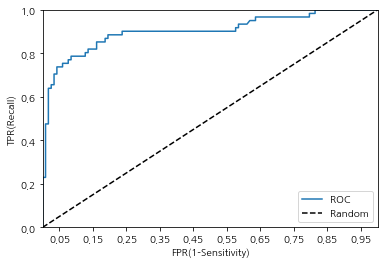

In [68]:
roc_curve_plot(y_test, pred_proba[:,1])

In [69]:
from sklearn.metrics import roc_auc_score
def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    
    # ROC-AUC print 추가
    print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}, F1:{:.4f}, AUC:{:.4f}\n'.format(accuracy, precision, recall,f1, roc_auc))
 

In [70]:
get_clf_eval(y_test, pred, pred_proba[:,1])

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869, F1:0.7805, AUC:0.9024



In [72]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값 :', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)
        
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값 : 0.4
오차행렬
[[99 19]
 [10 51]]
정확도 : 0.8380, 정밀도 : 0.7286, 재현율 : 0.8361, F1:0.7786, AUC:0.9024

임계값 : 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도 : 0.7656, 재현율 : 0.8033, F1:0.7840, AUC:0.9024

임계값 : 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869, F1:0.7805, AUC:0.9024

임계값 : 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도 : 0.8364, 재현율 : 0.7541, F1:0.7931, AUC:0.9024

임계값 : 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 : 0.8824, 재현율 : 0.7377, F1:0.8036, AUC:0.9024

